# Mission 1

Crée le symbole de l'infini avec Seaborn. Tu peux te servir de Cosinus ou de tout autre fonction. Ne te souçis pas de faire une courbe parfaite, il faut juste que les 2 tracés se croisent.

![symbole de l'infini](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Infinite.svg/1200px-Infinite.svg.png)

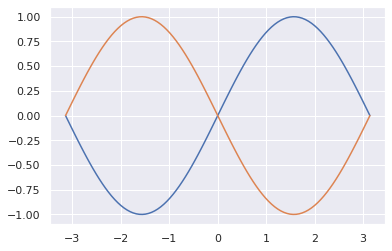

In [0]:

from math import pi
import numpy as np
import seaborn as sns
sns.set()

courbeExo = np.linspace(-pi, pi, 100)
courbeExo1 = np.sin(courbeExo)

#sns.lineplot(courbeExo, courbeExo )
sns.lineplot((courbeExo), (courbeExo1))
sns.lineplot((courbeExo), -(courbeExo1))


# Mission 2

Recré le visuel ci-dessous avec Seaborn

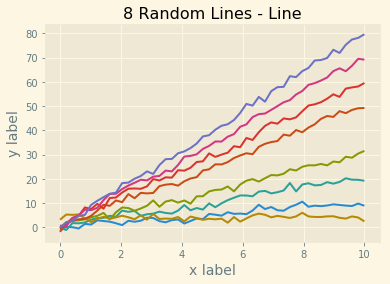

In [0]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 10)
with plt.style.context('Solarize_Light2'):
    plt.plot(x, np.sin(x) + x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 3 * x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 4 + np.random.randn(50))
    plt.plot(x, np.sin(x) + 5 * x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 6 * x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 7 * x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 8 * x + np.random.randn(50))
    plt.title('8 Random Lines - Line')
    plt.xlabel('x label', fontsize=14)
    plt.ylabel('y label', fontsize=14)

plt.show()

Text(0, 0.5, 'y label')

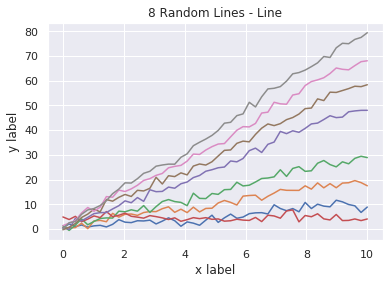

In [0]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set()
x = np.linspace(0, 10)
y = np.sin(x)

ax = sns.lineplot(x, y + x + np.random.randn(50))
sns.lineplot(x, y + 2 * x + np.random.randn(50))
sns.lineplot(x, y + 3 * x + np.random.randn(50))
sns.lineplot(x, y + 4 + np.random.randn(50))
sns.lineplot(x, y + 5 * x + np.random.randn(50))
sns.lineplot(x, y + 6 * x + np.random.randn(50))
sns.lineplot(x, y + 7 * x + np.random.randn(50))
sns.lineplot(x, y + 8 * x + np.random.randn(50))
ax.set_title('8 Random Lines - Line')
ax.set_xlabel('x label')
ax.set_ylabel('y label') 



# Mission 3

Recré le visuel ci-dessous avec Seaborn

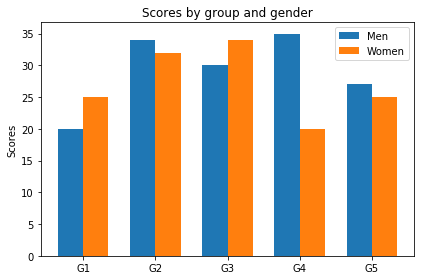

In [0]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels)) 
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

Text(0.5, 1.0, 'Scores by group and gender')

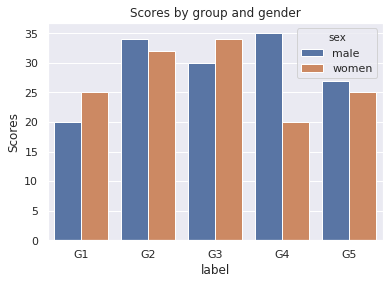

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

sexM = np.array(["male"] * 5)
sexW = np.array(["women"] * 5)

dM = pd.DataFrame({'label': labels, 'means':men_means, 'sex':sexM})
dw = pd.DataFrame({'label': labels, 'means':women_means, 'sex':sexW})

df = pd.concat([dM,dw])

df

ax = sns.barplot(x="label", y="means", hue="sex", data=df)

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')


# Mission 4

Commente de manière détaillé le code ci-dessous

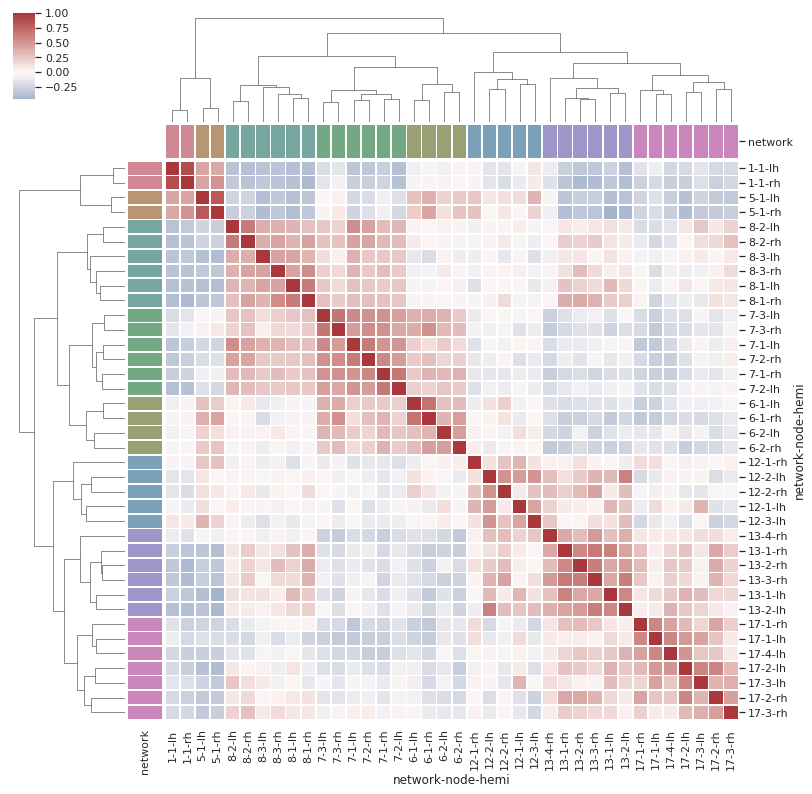

In [0]:
import pandas as pd #import pandas pour manipulé de donné
import seaborn as sns #Import seaborn pour fair la visualisation
sns.set()

df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0) #crée le dataframe

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]  #un liste de used_networks
used_columns = (df.columns.get_level_values("network") #pour attrpé les valuers dans le network
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns] #crée nouvelle dataframe avec toute les valuers de used_columns

network_pal = sns.husl_palette(8, s=.45) #Obtenez un ensemble de couleurs uniformément espacées dans l'espace de teinte HUSL
network_lut = dict(zip(map(str, used_networks), network_pal)) #combiner le used_networks avec network_pal

networks = df.columns.get_level_values("network") #Obtenez les valuers de network
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

sns.clustermap(df.corr(), center=0, cmap="vlag",  #crée le clustermap de sns avec valuers de dataframe correlations, en mention de row_colours et column_colours
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))